In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
X, y = sklearn.datasets.make_moons(200, noise = 0.15)

In [3]:
X

array([[ 1.60496113e+00, -1.48609522e-01],
       [ 2.03779911e-01, -2.60685476e-01],
       [ 5.53268405e-01, -6.07102346e-01],
       [ 9.25597532e-01, -5.80063077e-01],
       [ 2.13502863e-01,  4.90415309e-02],
       [ 1.55831726e-01,  5.11290974e-01],
       [ 7.84026461e-02,  1.20628246e-01],
       [ 7.24998784e-02,  1.21621339e+00],
       [ 8.56294893e-01,  7.55976812e-01],
       [-4.39788876e-02,  9.86920065e-01],
       [ 5.45279923e-01, -2.14464233e-01],
       [ 1.04531706e+00,  4.35323251e-01],
       [ 1.43086715e+00, -5.33298335e-01],
       [ 1.54678358e+00, -4.91425052e-01],
       [-6.77986138e-01,  1.04501651e+00],
       [-1.02429230e+00, -7.86329858e-02],
       [ 6.72590928e-01,  9.76003903e-01],
       [ 1.32585932e+00, -3.48049758e-01],
       [-1.15783464e+00,  3.43329807e-01],
       [ 3.30271902e-02,  2.81024692e-01],
       [ 7.39360926e-01,  2.45626055e-01],
       [ 4.06276211e-01, -3.76953376e-01],
       [ 1.99726250e+00,  3.95231134e-01],
       [ 3.

In [4]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1])

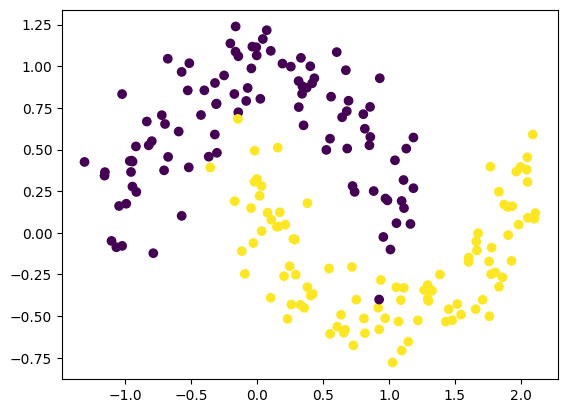

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y)

In [6]:
X.shape

(200, 2)

In [7]:
input_neurons = 2
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lambda_reg = 0.01

In [8]:
def retrieve(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2

In [9]:
def forward(x, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = X.dot(W1) + b1 
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims = True)
    return z1, a1, softmax

In [10]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted

    log_prob = -np.log(m)
    softmax_loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2*(np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss = softmax_loss + reg_loss
    return float(loss/ y.shape[0])

In [11]:
def predict(x, model_dict):
    W1, b1, W2, b2 = retrieve(model_dict)
    z1 = X.dot(W1) + b1 
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, dim=1, keepdims = True)
    return np.argmax(softmax, axis = 1)

In [12]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retrieve(model_dict)
        z1, a1, probs = forward(x, model_dict)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]),y] -=1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis = 0, keepdims = True)
        delta2 = delta3.dot(W2.T) * (1-np.power(np.tanh(z1),2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis = 0)
        dW2 += lambda_reg * np.sum(W2)
        dW1 += lambda_reg * np.sum(W1)

        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2

        model_dict = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i, loss(probs, y, model_dict)))
    return model_dict

In [13]:
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))

    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2

    return model

In [14]:
model_dict = init_network(input_neurons, 3, output_neurons)
model = backpropagation(X, y, model_dict, 1500)

Loss at epoch 0 is: 0.885
Loss at epoch 50 is: 0.320
Loss at epoch 100 is: 0.297
Loss at epoch 150 is: 0.291
Loss at epoch 200 is: 0.288
Loss at epoch 250 is: 0.286
Loss at epoch 300 is: 0.284
Loss at epoch 350 is: 0.282
Loss at epoch 400 is: 0.280
Loss at epoch 450 is: 0.278
Loss at epoch 500 is: 0.276
Loss at epoch 550 is: 0.274
Loss at epoch 600 is: 0.273
Loss at epoch 650 is: 0.271
Loss at epoch 700 is: 0.269
Loss at epoch 750 is: 0.268
Loss at epoch 800 is: 0.266
Loss at epoch 850 is: 0.265
Loss at epoch 900 is: 0.264
Loss at epoch 950 is: 0.263
Loss at epoch 1000 is: 0.262
Loss at epoch 1050 is: 0.261
Loss at epoch 1100 is: 0.260
Loss at epoch 1150 is: 0.259
Loss at epoch 1200 is: 0.258
Loss at epoch 1250 is: 0.256
Loss at epoch 1300 is: 0.254
Loss at epoch 1350 is: 0.248
Loss at epoch 1400 is: 0.236
Loss at epoch 1450 is: 0.219
